In [42]:
import pandas as pd
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [12]:
#Load the data
df = pd.read_csv('wine.data.csv')

#Remove and store first column of df
label = df['Label']
df = df.drop('Label', axis=1)

df.head(5)

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0    14.23        1.71  2.43               15.6        127           2.80   
1    13.20        1.78  2.14               11.2        100           2.65   
2    13.16        2.36  2.67               18.6        101           2.80   
3    14.37        1.95  2.50               16.8        113           3.85   
4    13.24        2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

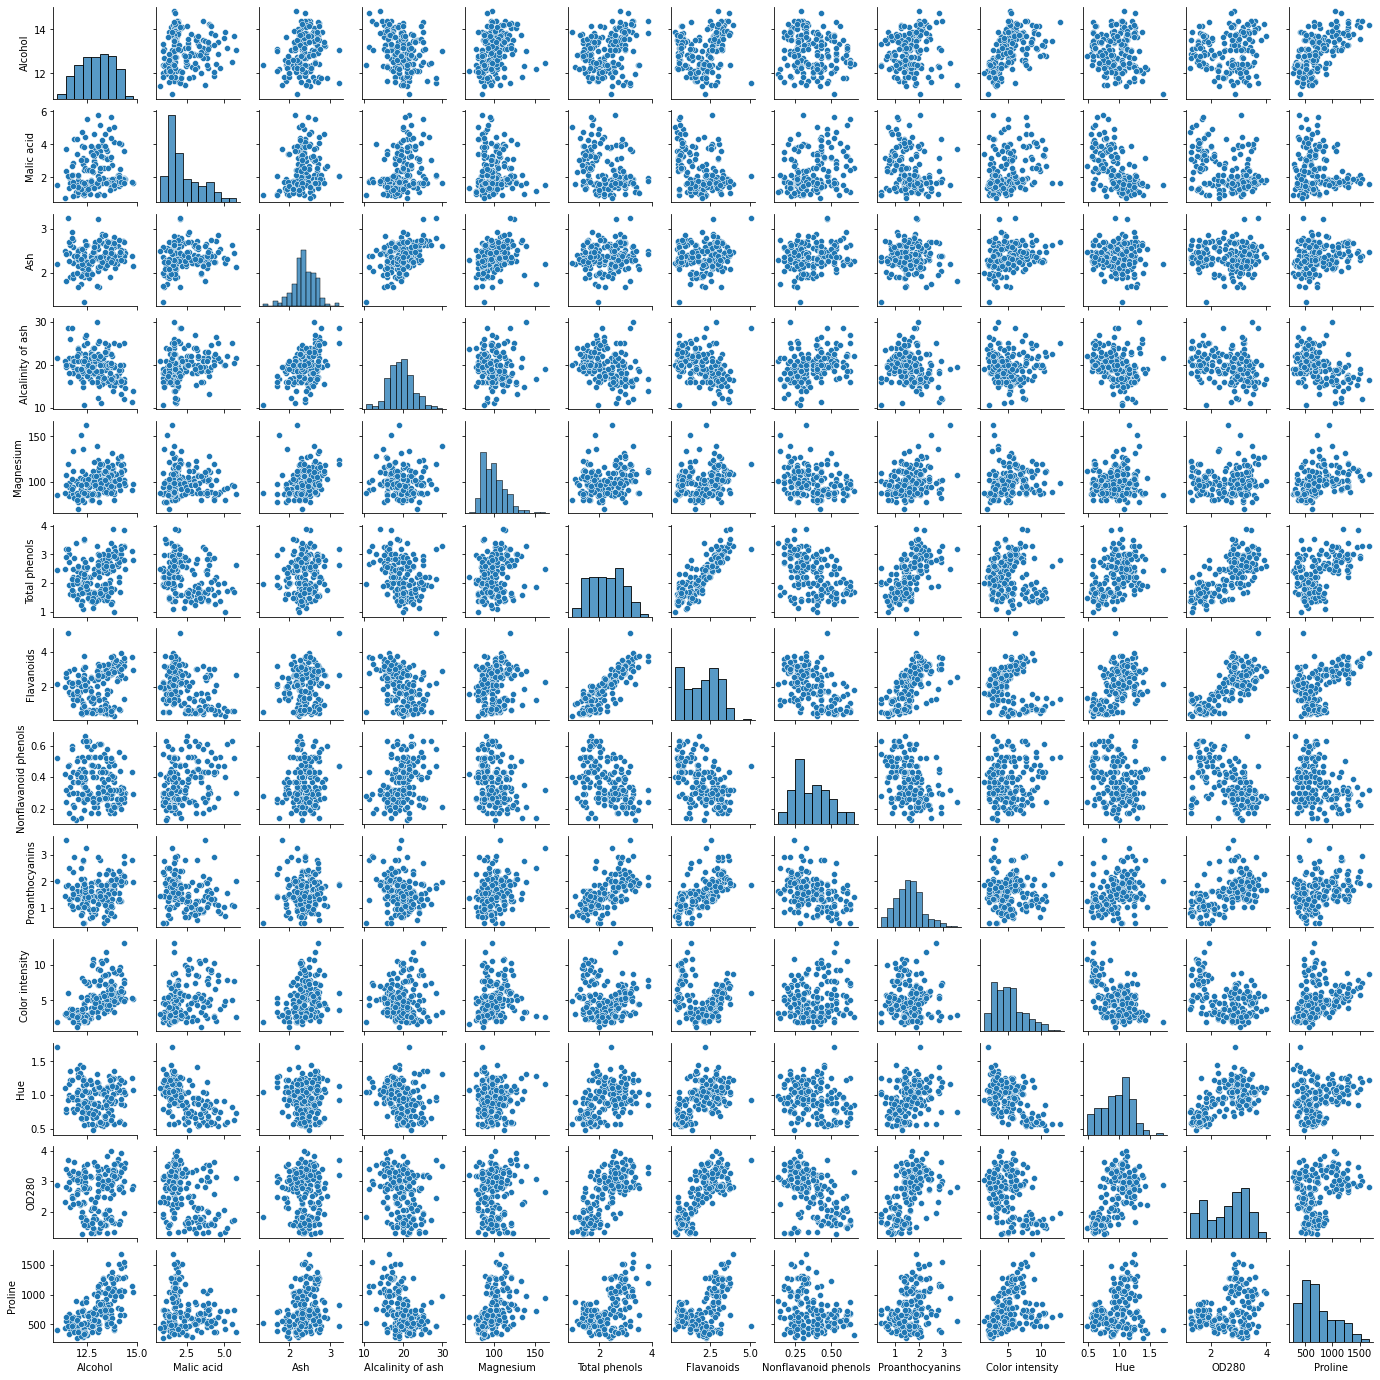

In [19]:
sns.pairplot(data=df, height=1.5);

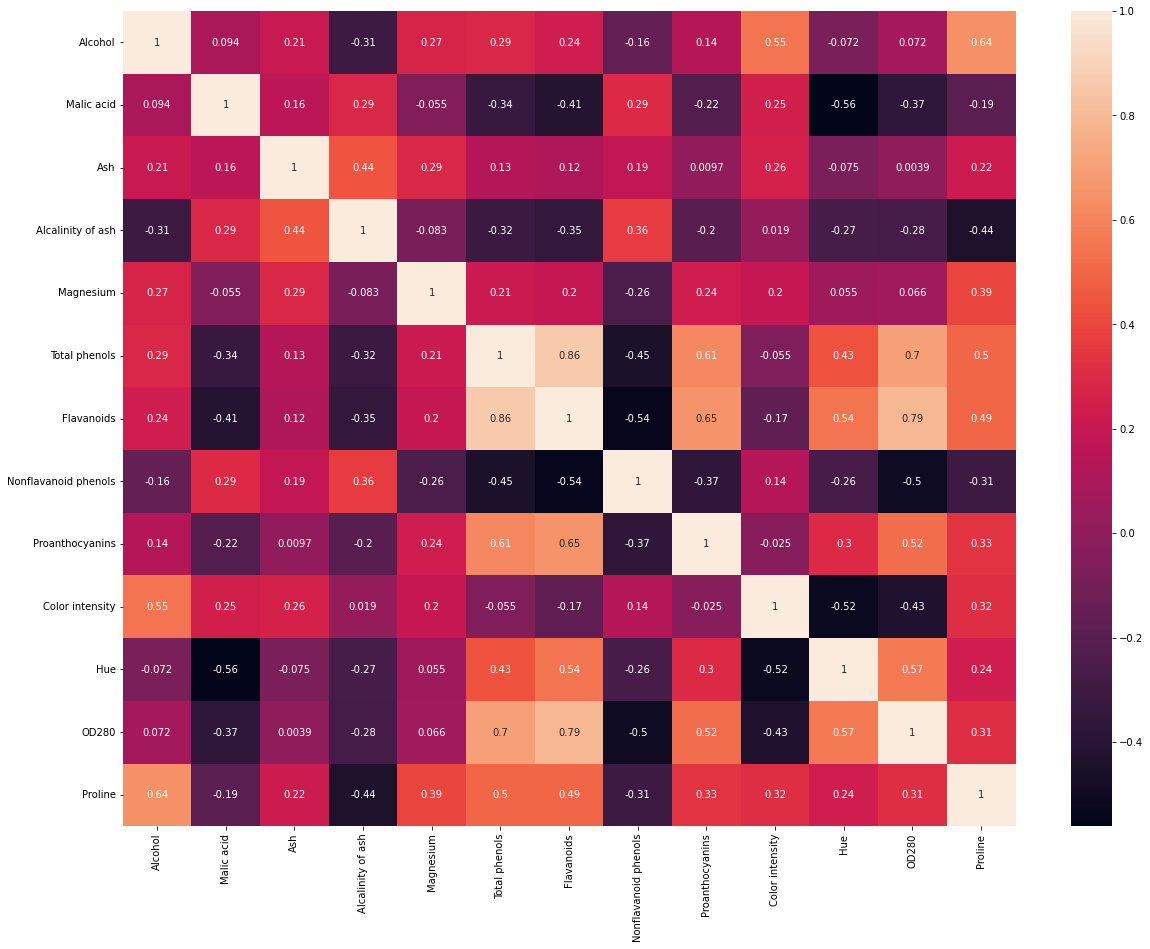

In [30]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True);

# Flavanoids and Total Phenols - 0.86 correlation
# OD280 and Flavanoids - 0.79 correlation
# OD280 and Total Phenols - 0.7 correlation

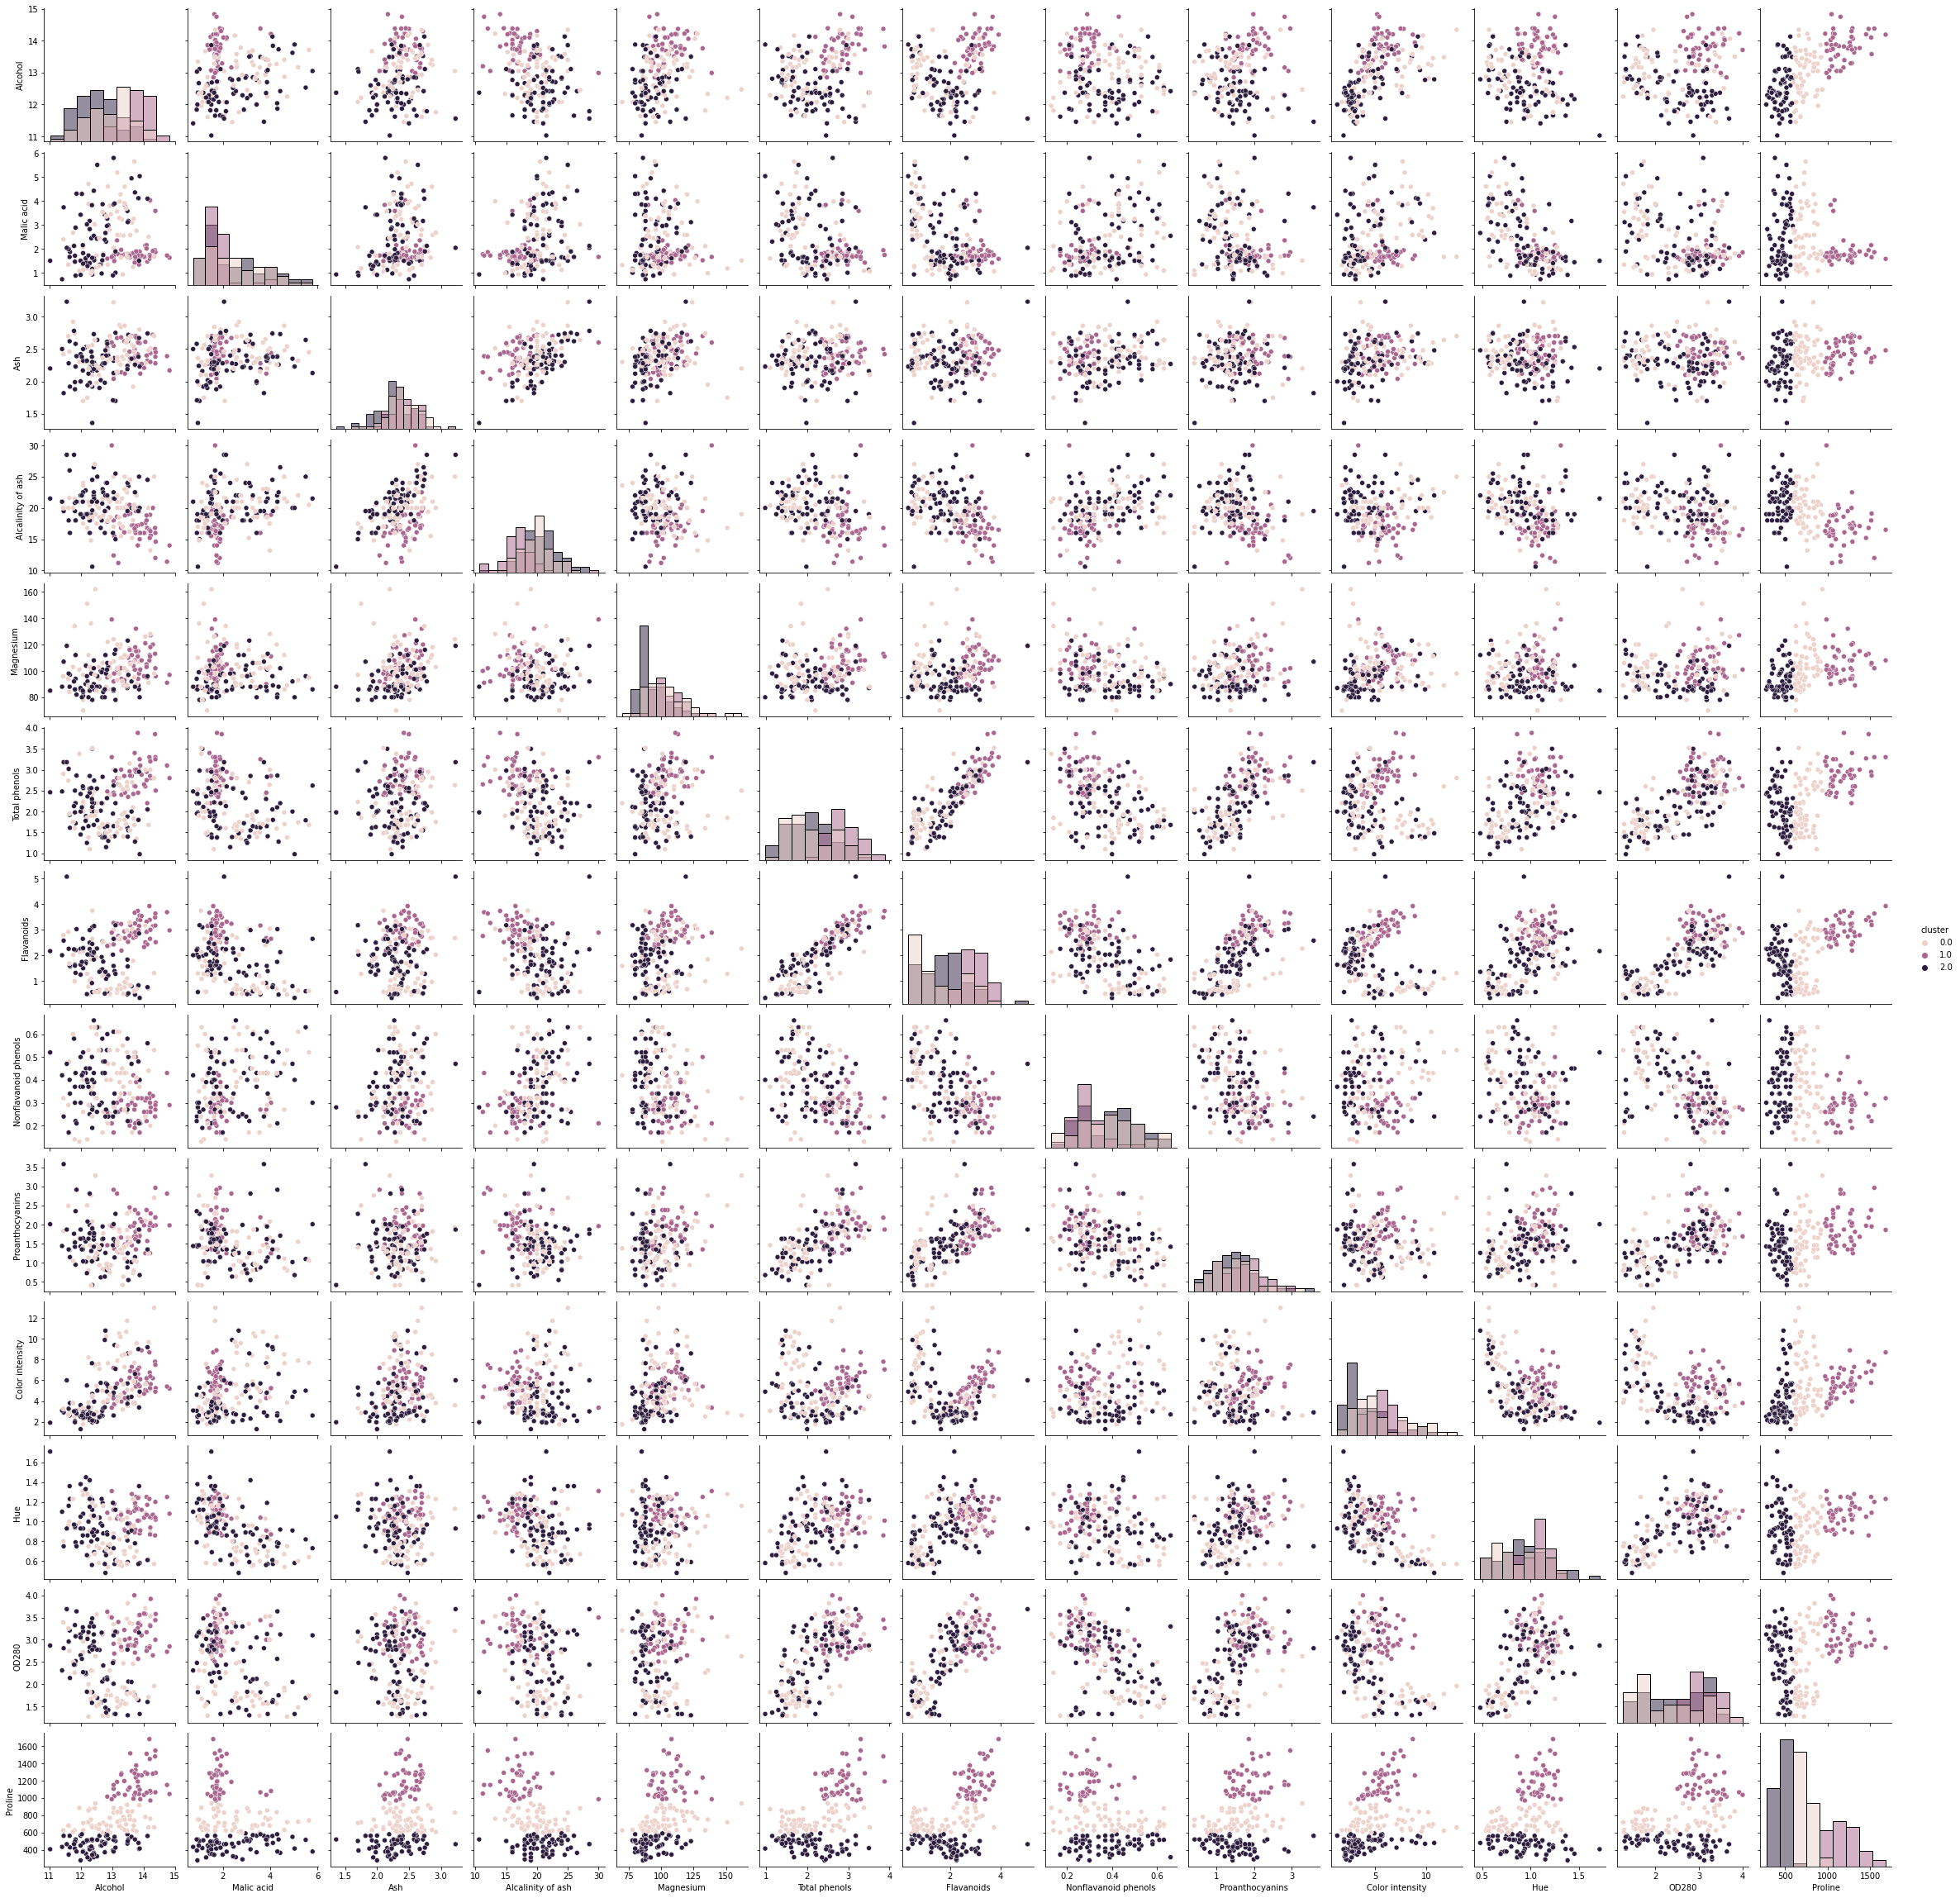

In [40]:
kMeansClustering = KMeans(n_clusters = 3, random_state=0)
res = kMeansClustering.fit_predict(df)
label_pred_KM = res
df["cluster"] = label_pred_KM.astype('float64')
sns_plot = sns.pairplot(df, hue = "cluster",diag_kind="hist")

In [45]:
standardScaler = preprocessing.StandardScaler()
standardScaler.fit(df)
X_scaled_array = standardScaler.transform(df)
normalizedData = pd.DataFrame(X_scaled_array, columns = df.columns)

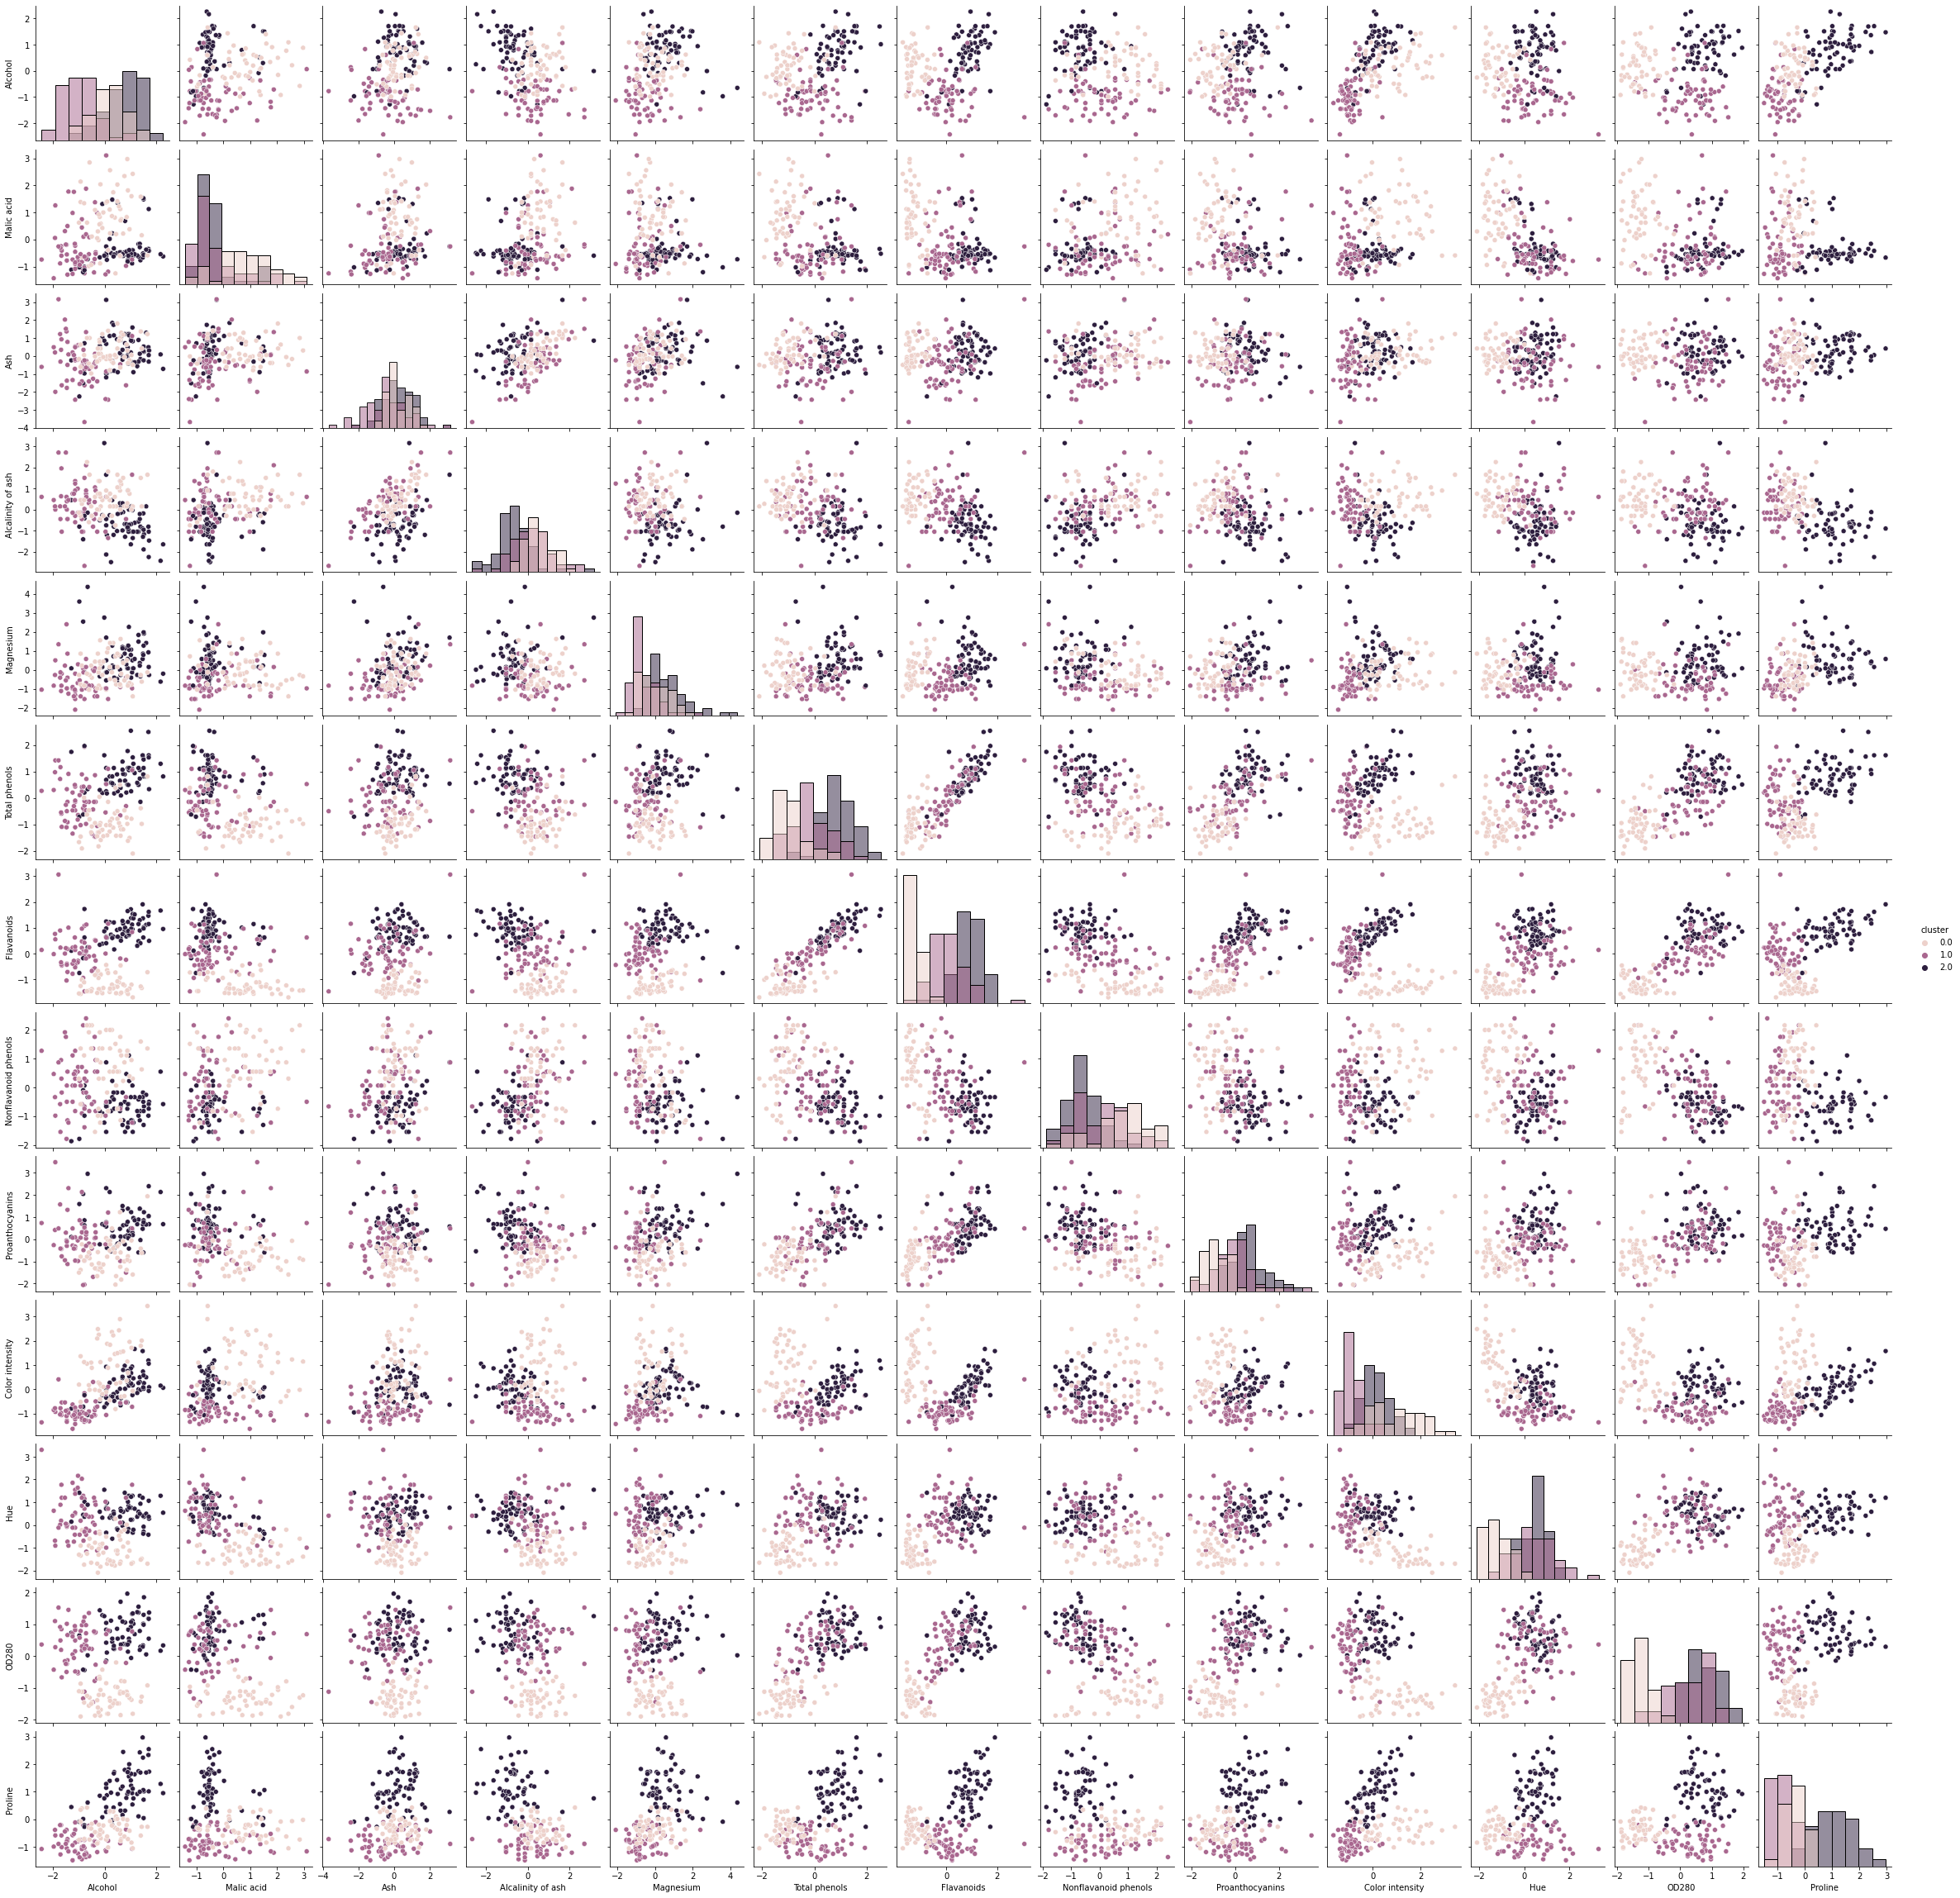

In [47]:
kMeansClustering = KMeans(n_clusters = 3, random_state=0)
res = kMeansClustering.fit_predict(normalizedData)
label_pred_KM = res
normalizedData["cluster"] = label_pred_KM.astype('float64')
sns_plot = sns.pairplot(normalizedData, hue = "cluster",diag_kind="hist")